# Initialization

In [1]:
import importlib
from safedigital import temperature as TR
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
sns.set(color_codes=True)
os.chdir('../')
os.chdir('../')
curDirectory = os.getcwd()
print(curDirectory)

c:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics


In [2]:
def TR_plot(date_str,test_name):		
	file_path = curDirectory + '\\' + date_str + test_name + '\\' + '1_Data formatted' + '\\' + date_str + '_data_clean_10s.csv'
	config_path = curDirectory + '\\' + date_str + test_name + '\\' + '1_Data formatted' + '\\' + date_str + '_config.json'
	fig_path = curDirectory + '\\' + date_str + test_name + '\\' + '3_Graphs'


	case = TR.TempRiseExperiment(file_path, config_path)
	case.find_balance_index(list(range(4, 9)) + list(range(60,64)) + list(range(10,13)) + list(range(14,21)))
	avg_amb_temp_ser = (case.data['t_oil_bottle_1'] + 
						case.data['t_oil_bottle_2'] +
						case.data['t_oil_bottle_3'] +
						case.data['t_oil_bottle_4']) / 4

	# data from STE203 sensors
	V1A_tr_ser = case.data['V2_A_T_bushing'] - avg_amb_temp_ser #V1
	V1B_tr_ser = case.data['V2_B_T_bushing'] - avg_amb_temp_ser #V1
	V1C_tr_ser = case.data['V2_C_T_bushing'] - avg_amb_temp_ser #V1


	# drop negative data
	V1A_tr_ser_pos = case.drop_data_negative(V1A_tr_ser)
	V1B_tr_ser_pos = case.drop_data_negative(V1B_tr_ser)
	V1C_tr_ser_pos = case.drop_data_negative(V1C_tr_ser)


	# data from thermal couples
	V1A_temp_dif_series = case.data['t_V2_phA_bushing'] - case.data['V2_A_T_bushing']
	V1B_temp_dif_series = case.data['t_V2_phB_bushing'] - case.data['V2_B_T_bushing']
	V1C_temp_dif_series = case.data['t_V2_phC_bushing'] - case.data['V2_C_T_bushing']


	V1A_temp_dif_drop_series = case.drop_data_threshold(V1A_temp_dif_series, 10) # difference can't be more than 10 regularly 
	V1B_temp_dif_drop_series = case.drop_data_threshold(V1B_temp_dif_series, 10)
	V1C_temp_dif_drop_series = case.drop_data_threshold(V1C_temp_dif_series, 10)


	# Plot TR by sensors for cable bushings and top extension bushings
	plt.figure(dpi=200) 
	plt.plot(V1A_tr_ser_pos,
			# linewidth=0.5,
				label="V1 phA max TempRise {:.1f}K".format(max(V1A_tr_ser_pos)))
	plt.plot(V1B_tr_ser_pos,
			# linewidth=0.5,
				label="V1 phB max TempRise {:.1f}K".format(max(V1B_tr_ser_pos)))
	plt.plot(V1C_tr_ser_pos,
			# linewidth=0.5,
				label="V1 phC max TempRise {:.1f}K".format(max(V1C_tr_ser_pos)))

		
	plt.legend(fontsize=5)
	plt.tick_params(labelsize=8)
	plt.title(date_str + ' TempRise')

	# Plot Temp difference between sensors and thermal couples
	plt.figure(dpi=200) 
	plt.plot(V1A_temp_dif_drop_series,
			# linewidth=0.5,
				label="V1 phA max abs difference {:.1f}K".format(max(abs(V1A_temp_dif_drop_series))))
	plt.plot(V1B_temp_dif_drop_series,
			# linewidth=0.5,
				label="V1 phB max abs difference {:.1f}K".format(max(abs(V1B_temp_dif_drop_series))))
	plt.plot(V1C_temp_dif_drop_series,
			# linewidth=0.5,
				label="V1 phC max abs difference {:.1f}K".format(max(abs(V1C_temp_dif_drop_series))))

	plt.legend(fontsize=5)
	plt.tick_params(labelsize=8)
	plt.title(date_str + ' Temp difference between sensors and thermal couples')	


	imb_df = case.data[['V2_A_T_bushing', 'V2_B_T_bushing', 'V2_C_T_bushing']]
	imb_df['Unit1_imb'] = [max(imb_df.loc[imb_df.index[i],'V2_A_T_bushing':'V2_C_T_bushing']) - 
							min(imb_df.loc[imb_df.index[i],'V2_A_T_bushing':'V2_C_T_bushing'])
							for i in range(len(imb_df))]
	# imb_df['Unit1=_imb'] = [max(imb_df.loc[imb_df.index[i],'Unit1=_A_T':'Unit1=_C_T']) - 
	# 						min(imb_df.loc[imb_df.index[i],'Unit1=_A_T':'Unit1=_C_T'])
	# 						for i in range(len(imb_df))]
	plt.figure(dpi=200)
	plt.plot(imb_df['Unit1_imb'],
				# linewidth=0.5,
				label="V1 max imbalance temp is {:.1f}K".format(max((imb_df['Unit1_imb']))))
	# plt.plot(imb_df['Unit1=_imb'],
	# 			# linewidth=0.5,
	# 			label="V1 extension max imbalance temp is {:.1f}K".format(max((imb_df['Unit1=_imb']))))		 
	plt.legend(fontsize=5)
	plt.tick_params(labelsize=8)
	plt.title(date_str + ' imbalance temp')

## 20220902
630A current till balanced no fault

Temperature balance time is 2022-09-02 17:23:50.


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


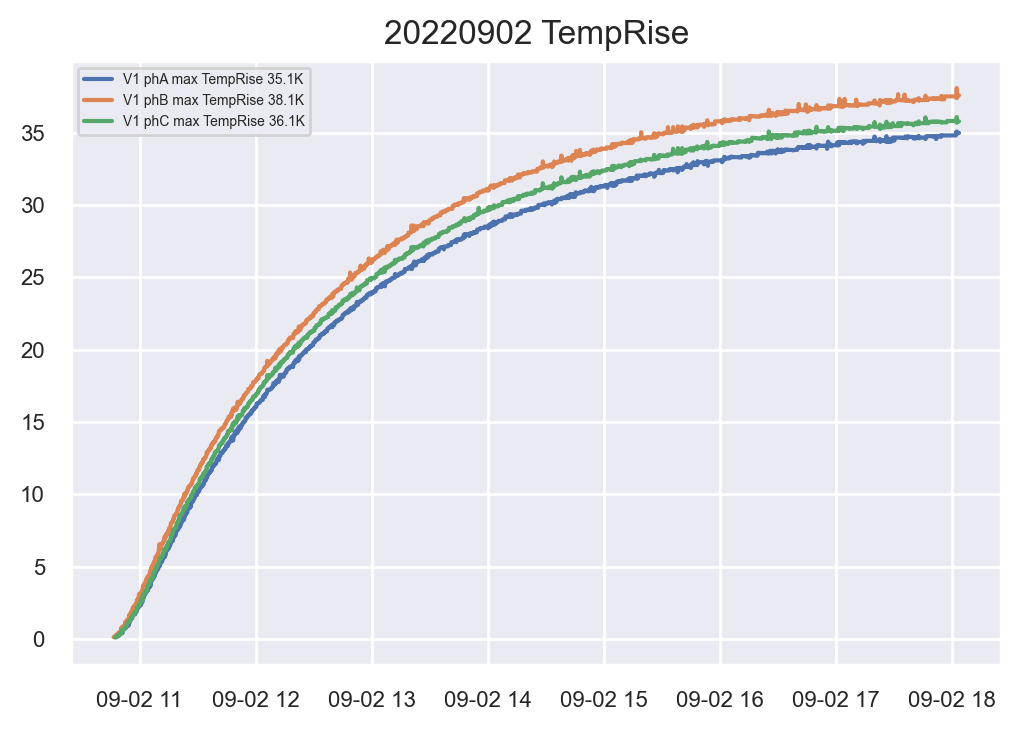

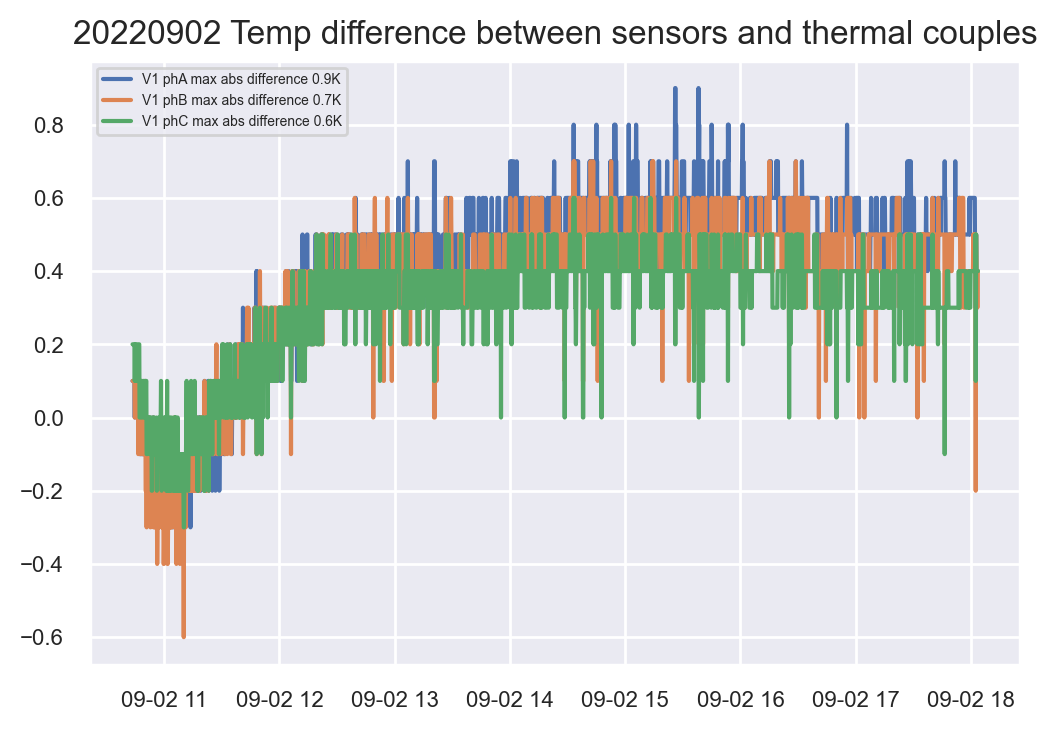

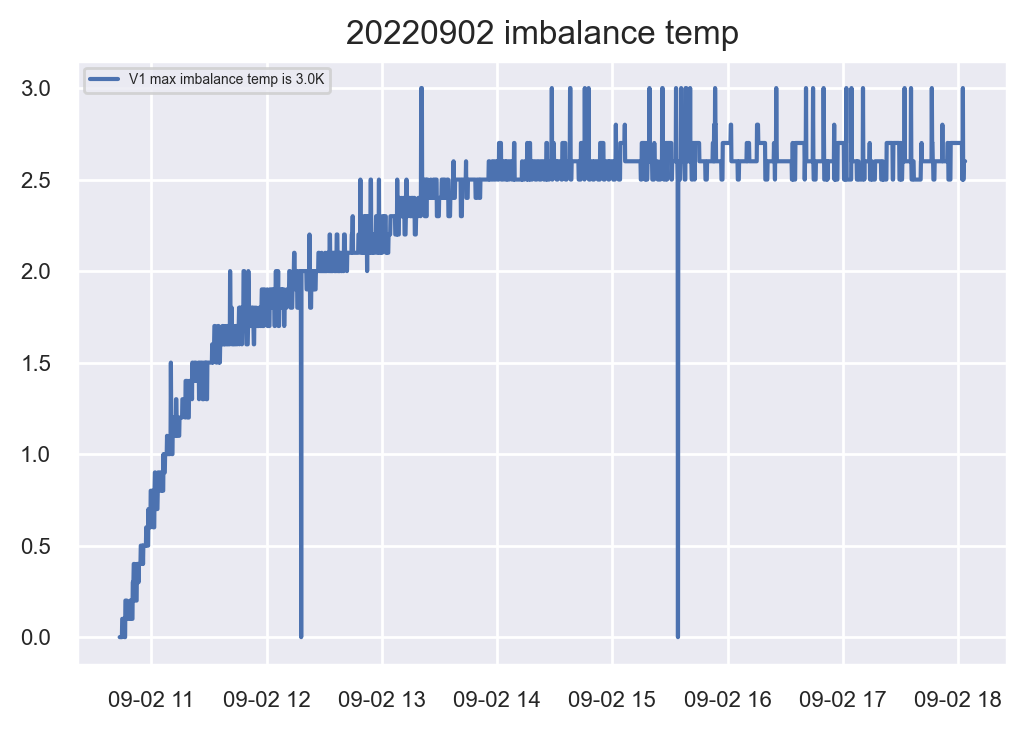

In [3]:
# file path for 20220902
importlib.reload(TR)
date_str = '20220902'
test_name = '_TR_SA12kV_SGCC_DV_Cable_Bushing_630A'
TR_plot(date_str,test_name)

## 20220905
700A current till balanced no fault

Temperature balance time is 2022-09-05 16:15:10.


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


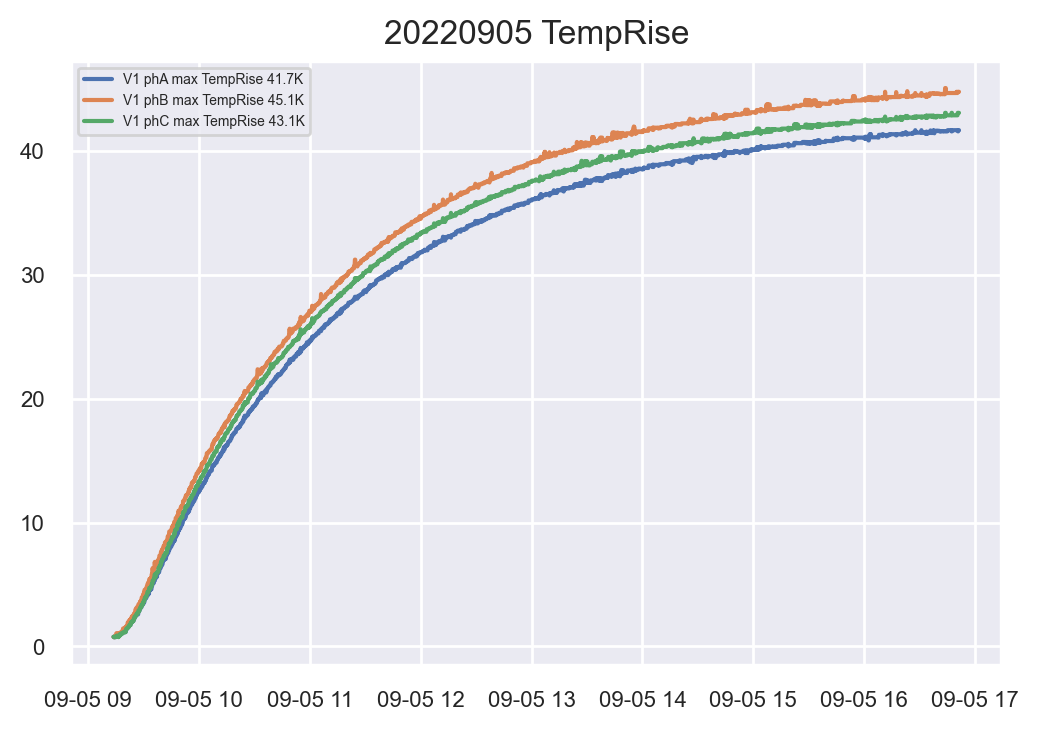

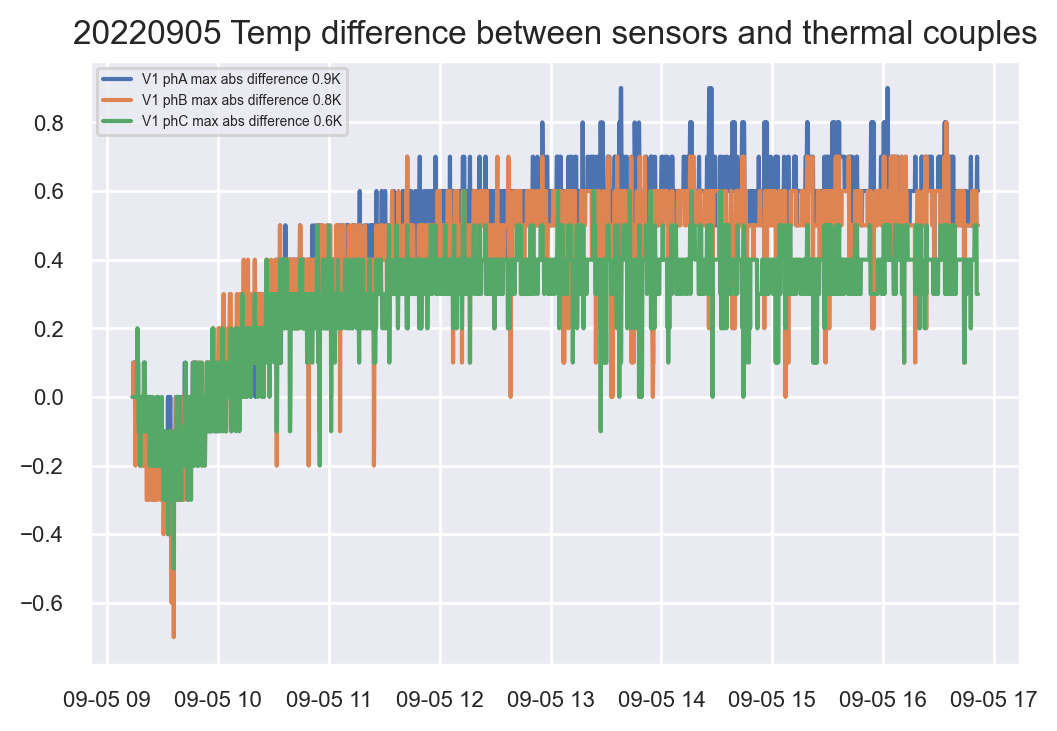

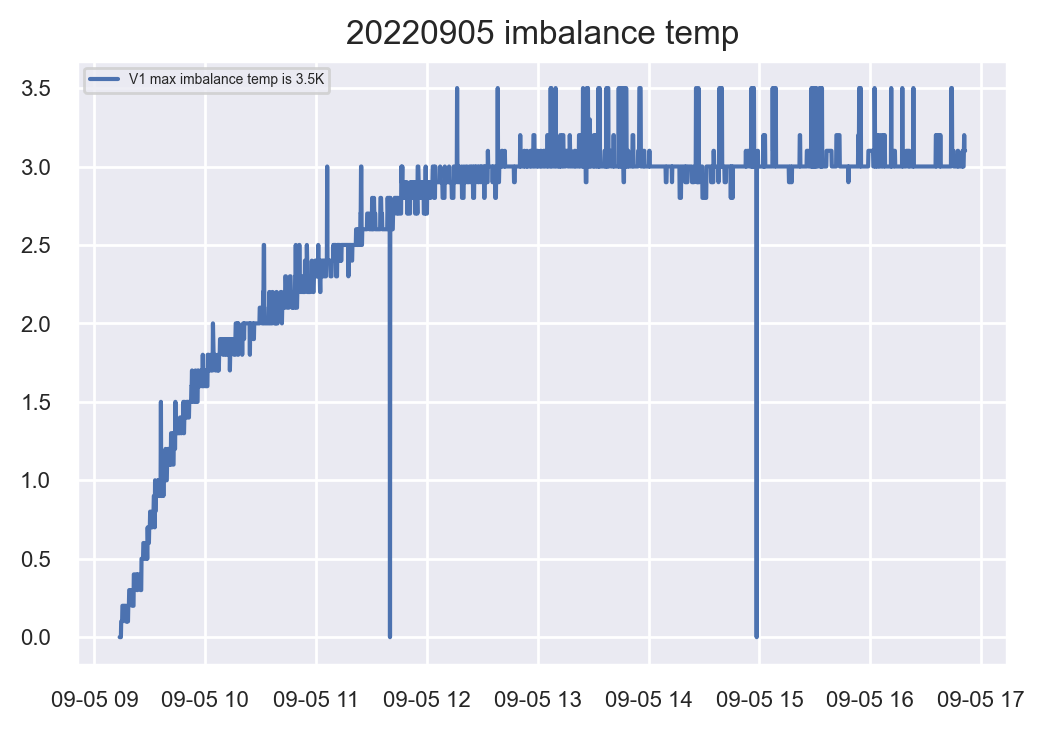

In [6]:
date_str = '20220905'
test_name = '_TR_SA12kV_SGCC_DV_Cable_Bushing_700A'
TR_plot(date_str,test_name)

## 20220906
500A,630A,500A current till balanced no fault

Temperature balance time is 2022-09-06 15:27:00.


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


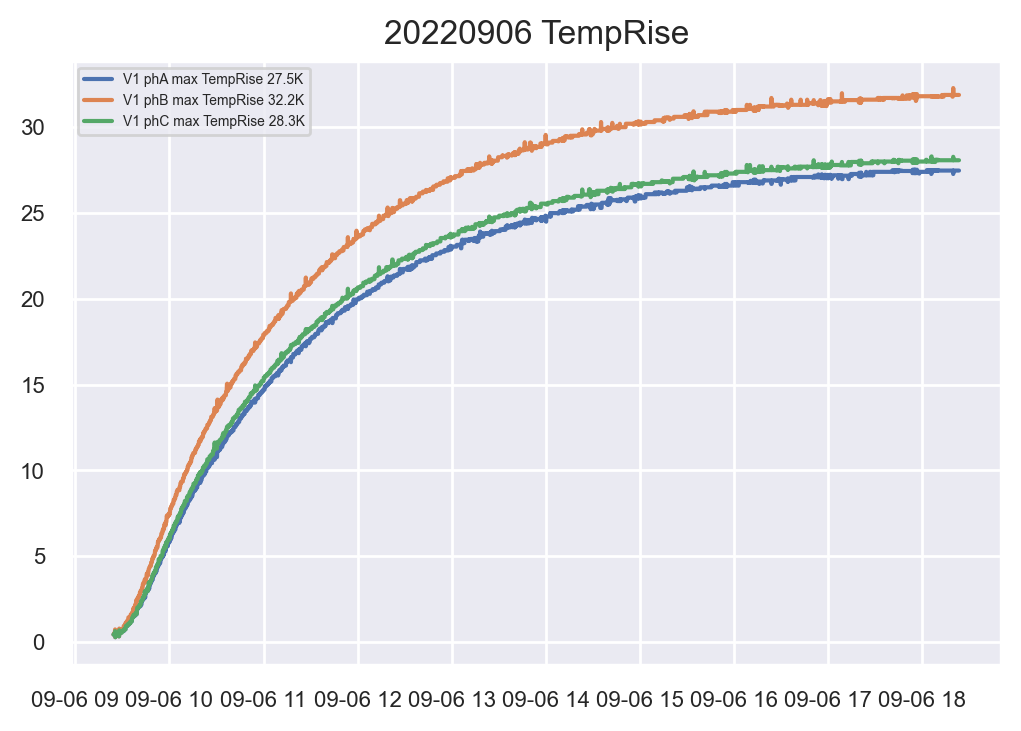

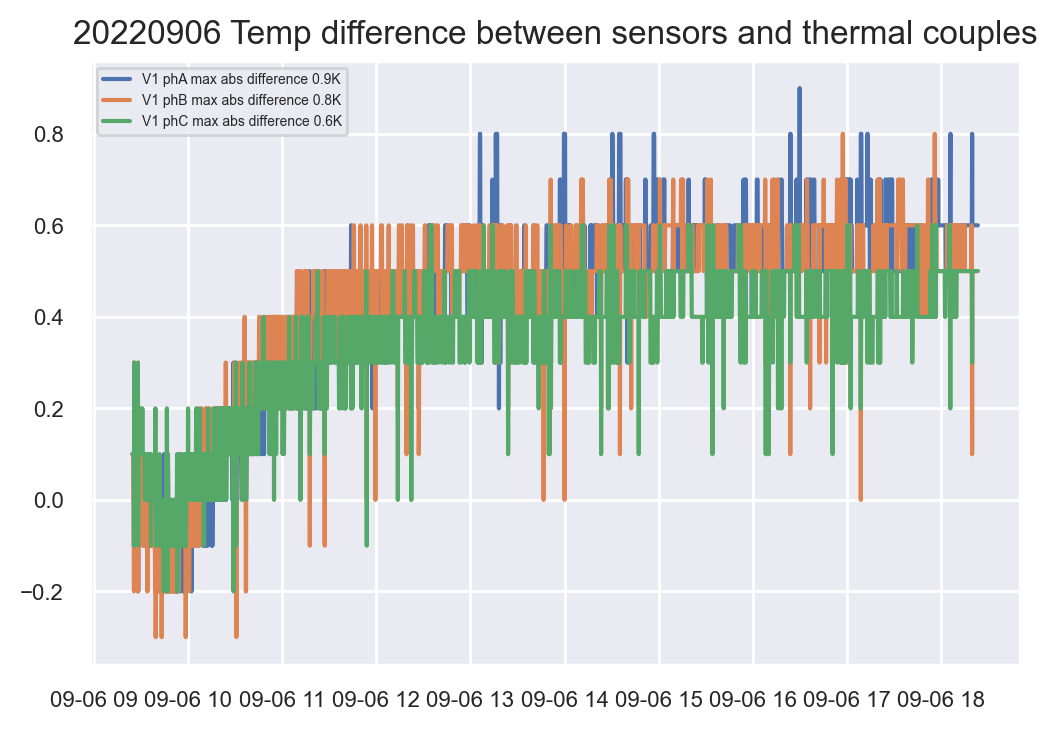

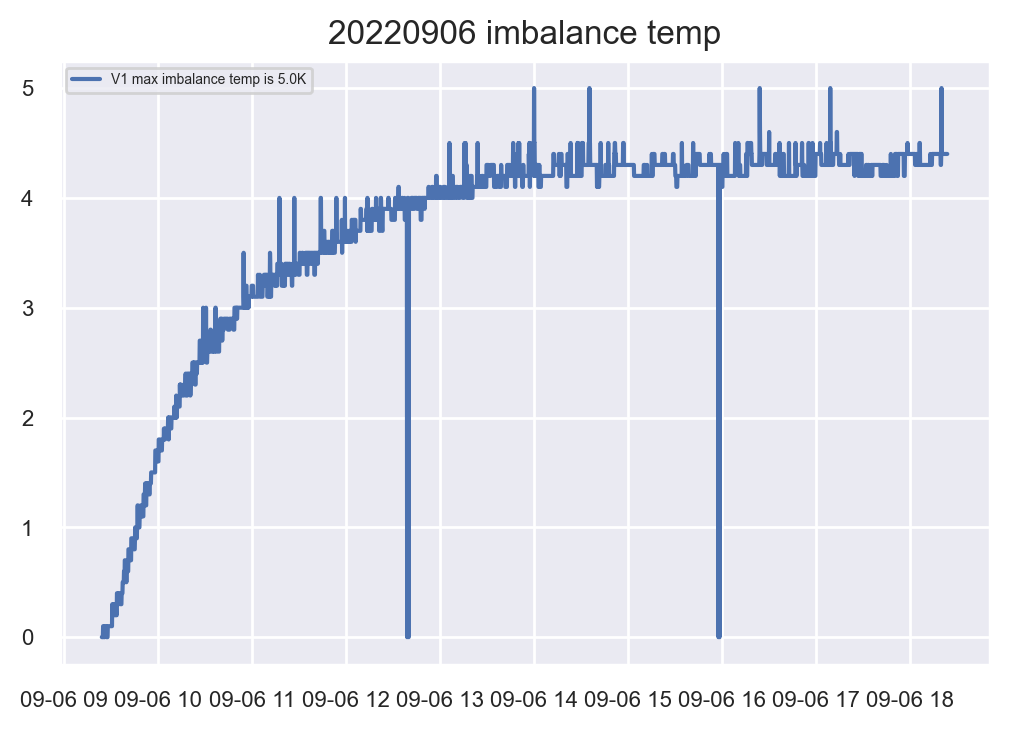

In [7]:
date_str = '20220906'
test_name = '_TR_SA12kV_SGCC_DV_Cable_Bushing_500A_630A_500A'
TR_plot(date_str,test_name)

## 20220907
500A,630A,500A current till balanced no fault

Temperature balance time is 2022-09-07 15:48:30.


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


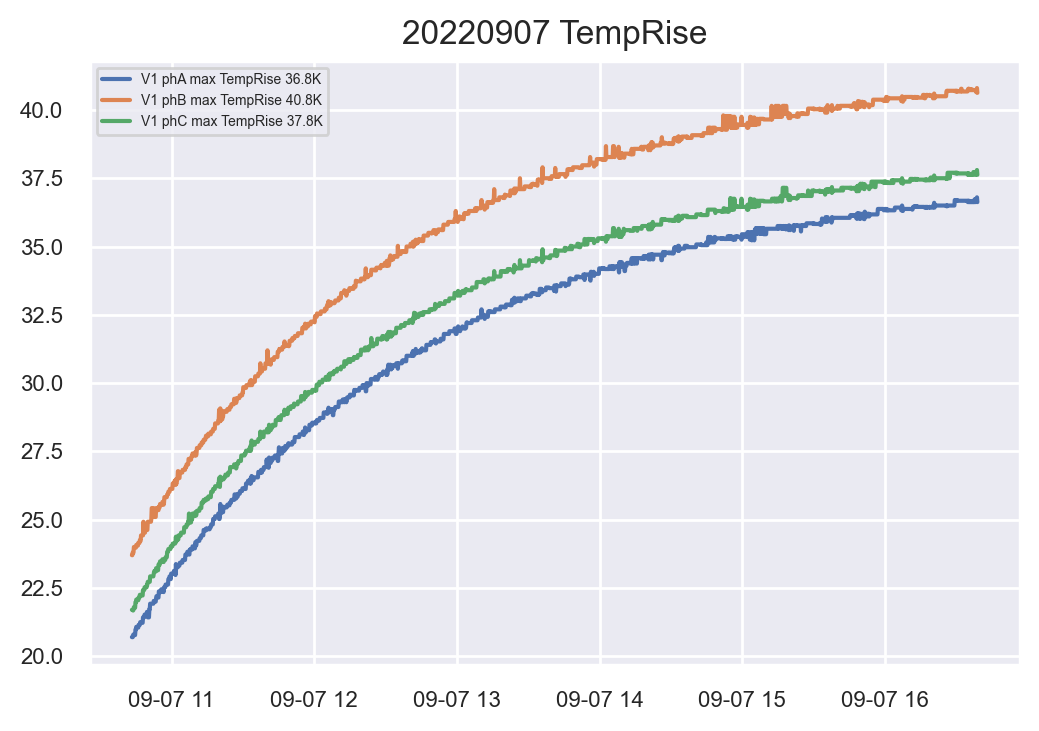

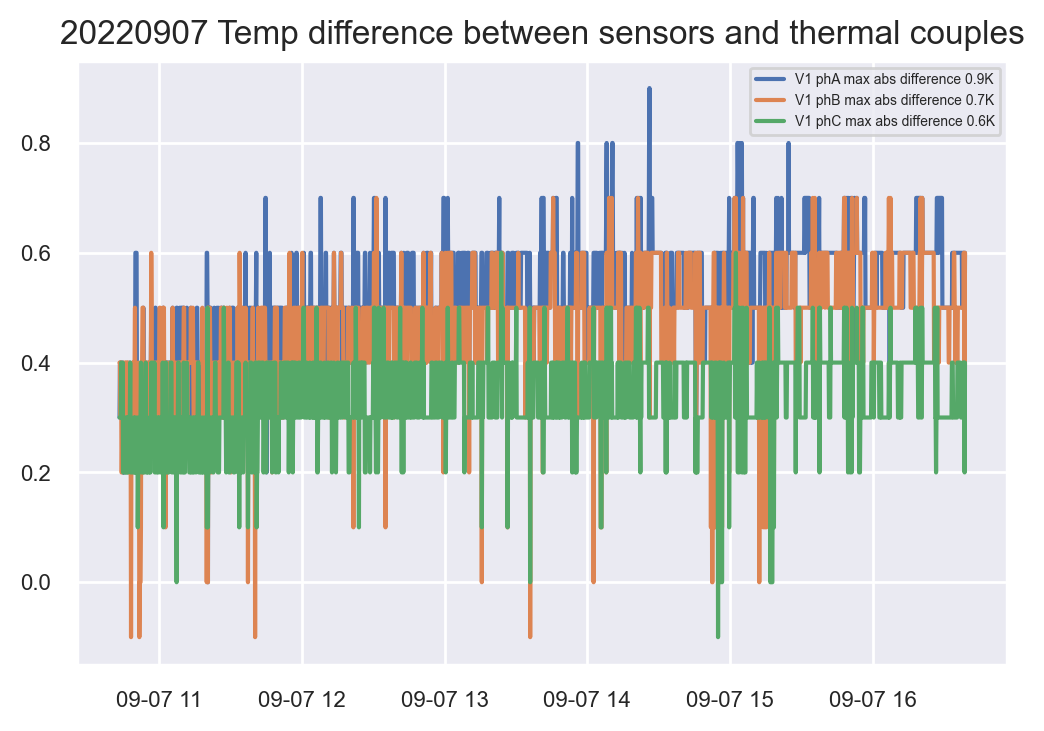

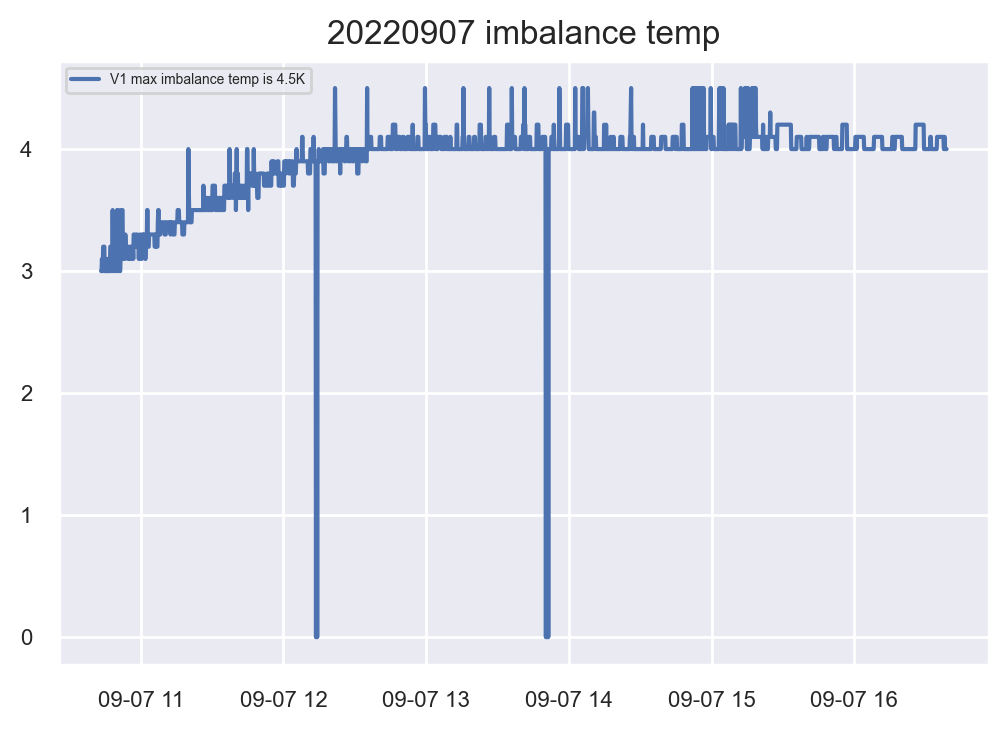

In [8]:
date_str = '20220907'
test_name = '_TR_SA12kV_SGCC_DV_Cable_Bushing_630A_700A_630A'
TR_plot(date_str,test_name)

## 20220908
630A current till balanced with Phase B fault

Temperature balance time is 2022-09-08 15:42:10.


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


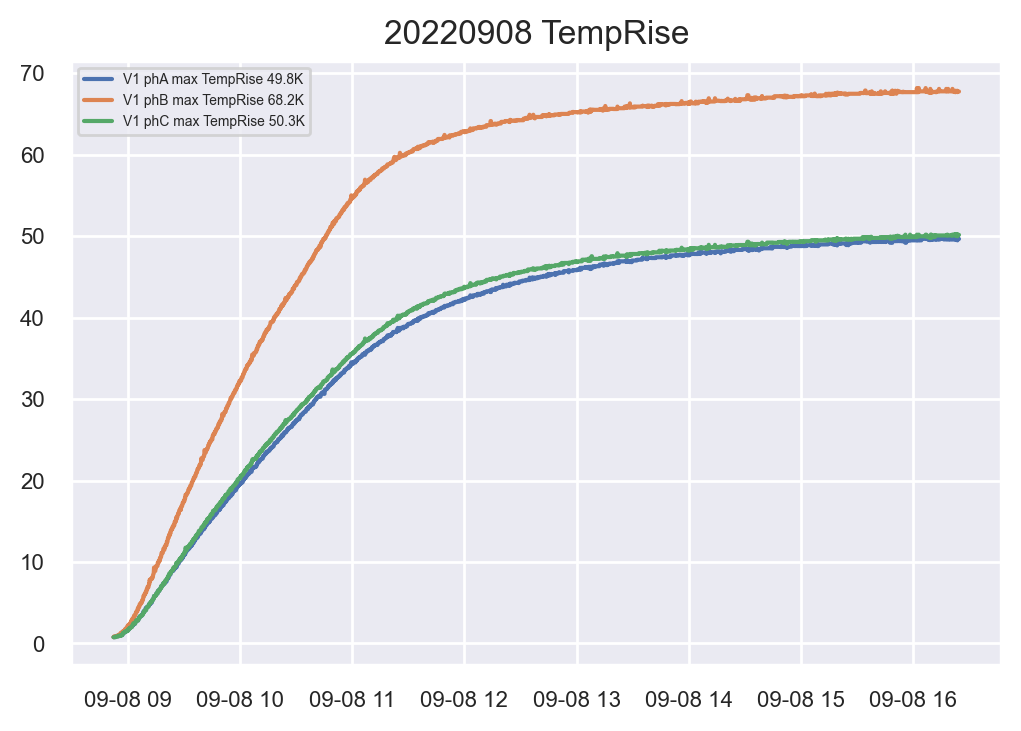

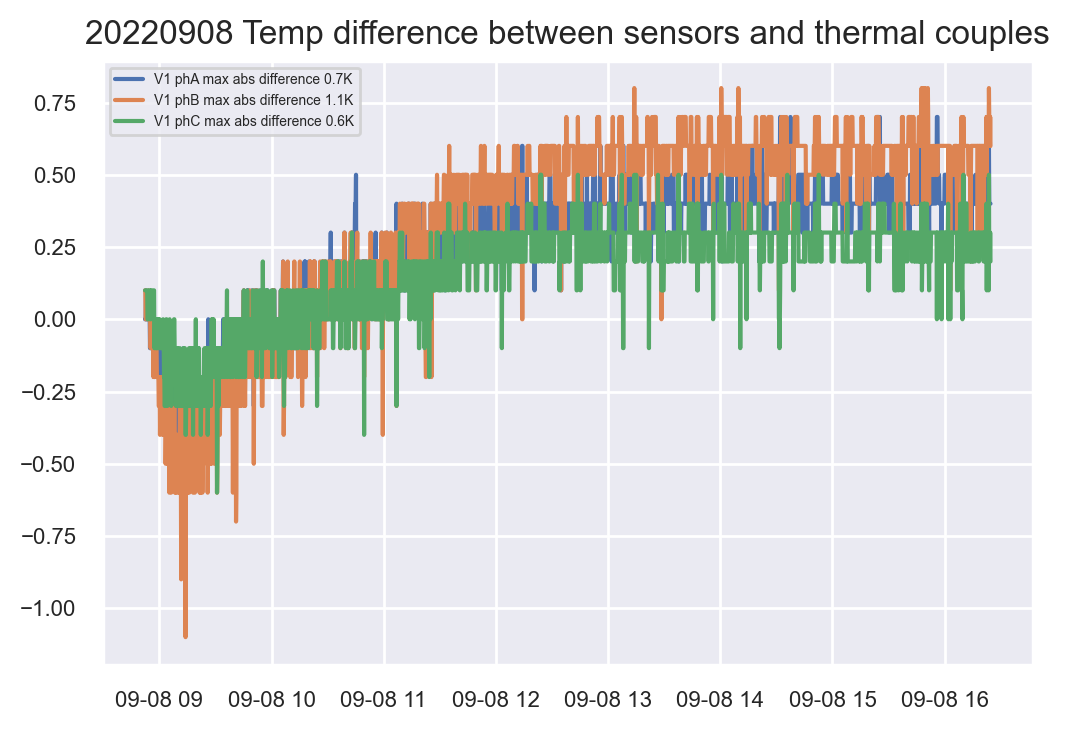

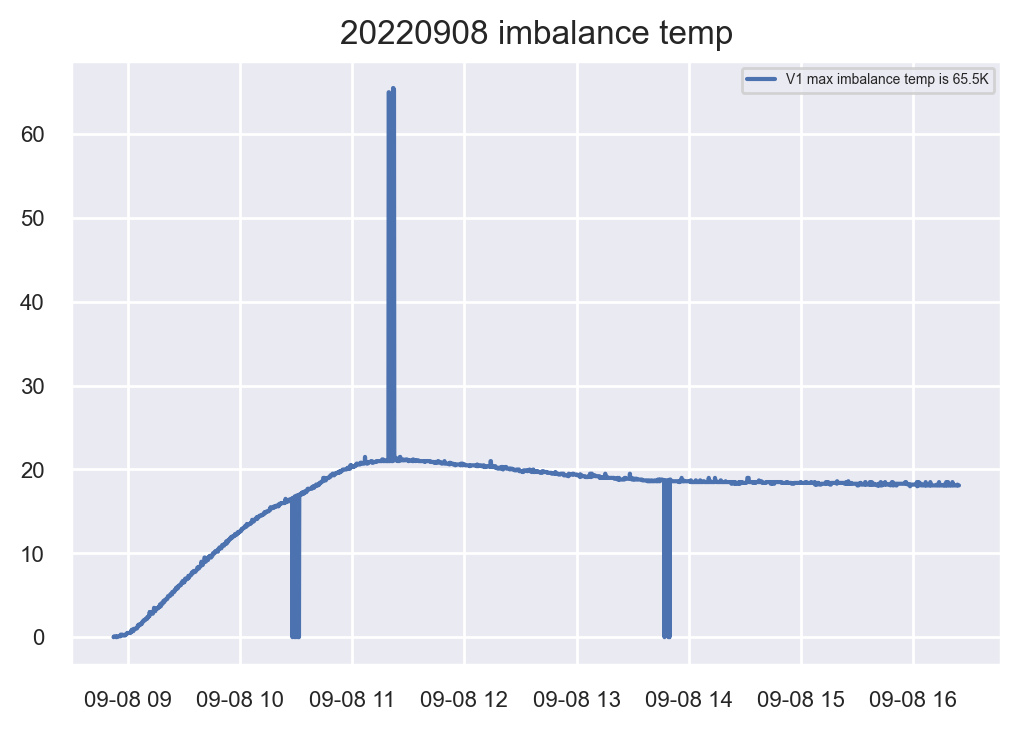

In [6]:
date_str = '20220908'
test_name = '_TR_SA12kV_SGCC_DV_Cable_Bushing_630A_Fault'
TR_plot(date_str,test_name)